In [1]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk 
import win32com.client as win32

In [2]:
codigo_negociacao=['^BVSP','BRL=X']

hoje= datetime.datetime.now()
um_ano_atras= hoje - datetime.timedelta(days=365)


dados_mercado= yf.download(codigo_negociacao, um_ano_atras, hoje)

[*********************100%***********************]  2 of 2 completed


In [3]:
display(dados_mercado)



Adj Close               Close                High            \
               BRL=X     ^BVSP     BRL=X     ^BVSP     BRL=X     ^BVSP   
Date                                                                     
2022-02-18  5.170600  112768.0  5.170600  112768.0  5.175100  114213.0   
2022-02-21  5.137500  111725.0  5.137500  111725.0  5.149900  113405.0   
2022-02-22  5.102700  112892.0  5.102700  112892.0  5.106600  113315.0   
2022-02-23  5.057100  112008.0  5.057100  112008.0  5.060600  113721.0   
2022-02-24  5.008700  111592.0  5.008700  111592.0  5.146600  112001.0   
...              ...       ...       ...       ...       ...       ...   
2023-02-13  5.213483  108846.0  5.213483  108846.0  5.221400  109193.0   
2023-02-14  5.158400  107659.0  5.158400  107659.0  5.180900  109564.0   
2023-02-15  5.191500  109442.0  5.191500  109442.0  5.237500  110210.0   
2023-02-16  5.218000  109905.0  5.218000  109905.0  5.255600  110437.0   
2023-02-17  5.216800       NaN  5.216800       NaN  5.245128       NaN   

                 Low                Open           Volume              
               BRL=X     ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                   
2022-02-18  5.116900  112701.0  5.168756  113534.0      0  11300700.0  
2022-02-21  5.074800  111608.0  5.136400  112880.0      0   7864900.0  
2022-02-22  5.046696  111727.0  5.102300  111727.0      0  12707000.0  
2022-02-23  4.996500  111748.0  5.057200  112892.0      0  12120600.0  
2022-02-24  5.000000  109125.0  5.006725  112001.0      0  16794700.0  
...              ...       ...       ...       ...    ...         ...  
2023-02-13  5.159000  107420.0  5.213483  108074.0      0   9973600.0  
2023-02-14  5.126578  107557.0  5.158400  108839.0      0  11894600.0  
2023-02-15  5.144326  107267.0  5.191500  107849.0      0  15499500.0  
2023-02-16  5.195920  108378.0  5.218000  109599.0      0  12995900.0  
2023-02-17  5.171154       NaN  5.216800       NaN      0         NaN  

[261 rows x 12 columns]

In [4]:
dados_fechamento= dados_mercado['Adj Close']

dados_fechamento.columns=['dolar','ibovespa']

dados_fechamento=dados_fechamento.dropna()
dados_fechamento

fechamento_diario_bovespa= dados_fechamento.iloc[-1,1]
fechamento_diario_dolar= dados_fechamento.iloc[-1,0]
fechamento_diario_dolar



5.2179999351501465

In [5]:
dados_anuais= dados_fechamento.resample('Y').last()

dados_mensais= dados_fechamento.resample('M').last()





In [6]:
retorno_anual= dados_anuais.pct_change().dropna()

In [7]:
retorno_anual

,dolar,ibovespa
Date,,
2023-12-31,-0.009266,-0.001145


In [8]:
retorno_mensal= dados_mensais.pct_change().dropna()

In [9]:
retorno_mensal

,dolar,ibovespa
Date,,
2022-03-31,-0.068818,0.060605
2022-04-30,0.035243,-0.101026
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602


In [10]:
retorno_diario= dados_fechamento.pct_change().dropna()
retorno_diario

,dolar,ibovespa
Date,,
2022-02-21,-0.006402,-0.009249
2022-02-22,-0.006774,0.010445
2022-02-23,-0.008937,-0.007830
2022-02-24,-0.009571,-0.003714
2022-02-25,0.022661,0.013890
...,...,...
2023-02-10,0.017309,0.003405
2023-02-13,-0.014371,0.006436
2023-02-14,-0.010565,-0.010905


In [11]:
retorno_ultimoano_dolar= round(retorno_anual.iloc[-1,0]*100,2)
retorno_ultimoano_bovespa= round(retorno_anual.iloc[-1,1]*100,2)

retorno_ultimomes_dolar= round(retorno_mensal.iloc[-1,0]*100,2)
retorno_ultimomes_bovespa= round(retorno_mensal.iloc[-1,1]*100,2)

retorno_ultimodia_dolar= round(retorno_diario.iloc[-1,0]*100,2)
retorno_ultimodia_bovespa= round(retorno_diario.iloc[-1,1]*100,2)

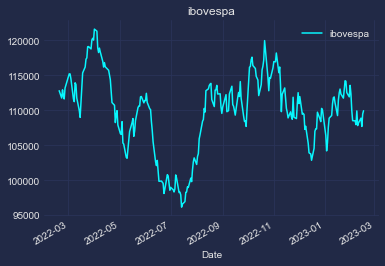

In [12]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y='ibovespa', use_index= True)

plt.title('ibovespa')
plt.savefig('ibovespa.png', dpi =300)
plt.show()

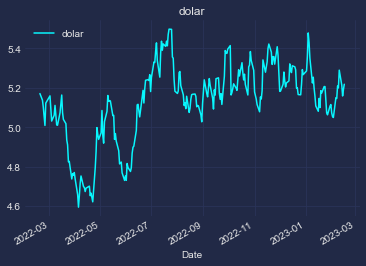

In [13]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y='dolar', use_index= True)

plt.title('dolar')
plt.savefig('dolar.png', dpi =300)
plt.show()

In [14]:
outlook = win32.Dispatch('outlook.application')

email= outlook.Createitem(0)

email.To= 'topperandrade@gmail.com'
email.Subject= 'Relatório Diário'
email.body= f''' Prezado cliente, segue, como de costume, nosso relatório diário:

Bovespa:

No ano, O bovespa está tendo uma rentabilidade de {retorno_ultimoano_bovespa}%,
enquanto no mês, a rentabilidade é de {retorno_ultimomes_bovespa}%.

No último dia útil, o fechamento de mercado foi de {fechamento_diario_bovespa}, rendendo {retorno_ultimodia_bovespa}%.

Dolar:

No ano, O bovespa está tendo uma rentabilidade de {retorno_ultimoano_dolar}%,
enquanto no mês, a rentabilidade é de {retorno_ultimomes_dolar}%.

No último dia útil, o fechamento de mercado foi de {fechamento_diario_dolar}, rendendo {retorno_ultimodia_dolar}%.

Tamo chegando, papai.

ui!












'''



anexo_bovespa= r'C:\Users\arthur\Projetos Phyton Data Science/ibovespa.png'
anexo_dolar= r'C:\Users\arthur\Projetos Phyton Data Science/dolar.png'

email.Attachments.Add(anexo_bovespa)
email.Attachments.Add(anexo_dolar)

email.Send()

com_error: (-2147467260, 'Operação anulada', None, None)

In [101]:
print(f''' Prezado cliente, segue, como de costume, nosso relatório diário:

Bovespa:

No ano, O bovespa está tendo uma rentabilidade de {retorno_ultimoano_bovespa}%,
enquanto no mês, a rentabilidade é de {retorno_ultimomes_bovespa}%.

No último dia útil, o fechamento de mercado foi de {fechamento_diario_bovespa}, rendendo {retorno_ultimodia_bovespa}%.

Dolar:

No ano, O bovespa está tendo uma rentabilidade de {retorno_ultimoano_dolar}%,
enquanto no mês, a rentabilidade é de {retorno_ultimomes_dolar}%.

No último dia útil, o fechamento de mercado foi de {fechamento_diario_dolar}, rendendo {retorno_ultimodia_dolar}%.

Tamo chegando, papai.

ui!












''')

 Prezado cliente, segue, como de costume, nosso relatório diário:

Bovespa:

No ano, O bovespa está tendo uma rentabilidade de -1.43%,
enquanto no mês, a rentabilidade é de -4.47%.

No último dia útil, o fechamento de mercado foi de 108456.0, rendendo -0.03%.

Dolar:

No ano, O bovespa está tendo uma rentabilidade de -2.22%,
enquanto no mês, a rentabilidade é de 0.68%.

No último dia útil, o fechamento de mercado foi de 5.149799823760986, rendendo 1.99%.

Tamo chegando, papai.

ui!













